<a href="https://github.com/EmmanuelADAM/IntelligenceArtificiellePython/blob/master/summerSchool/NN_5_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example of a recurrent network using LSTM

This example shows that an LSTM-type network can learn to predict a value based on previous values.

1. Curves are generated (1000 curves containing 20 values, with one value per time step).
2. For each curve, the network learns to predict the 20th value from the previous 19 values.
  - It proposes a value, measures its error, and then possibly corrects its weights.
  - The correction of the weights is done by backtracking through the time steps of the sequence.
- For long sequences, the earlier values are thus less well "learned."
3. A test illustrates the quality of the learning.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Function to generate a simple sequence dataset
def generate_time_series_data(num_samples, sequence_length=20):
    """
    Generate time series data with longer dependencies to showcase LSTM advantages.
    Each sequence contains a pattern where a value at the beginning influences the end.
    """
    # Generate sequences where the output depends on both recent and early values
    data = np.zeros((num_samples, sequence_length))
    for i in range(num_samples):
        # Starting values
        data[i, 0] = np.random.uniform(0, 1)
        data[i, 1] = np.random.uniform(0, 1)
        
        # Generate sequence with both short and long-term dependencies
        for j in range(2, sequence_length):
            if j < 10:
                # Short-term dependency (previous two values + noise)
                data[i, j] = 0.6 * data[i, j-1] + 0.3 * data[i, j-2] + np.random.normal(0, 0.05)
            else:
                # Add long-term dependency (influenced by early values + recent values)
                data[i, j] = 0.6 * data[i, j-1] + 0.2 * data[i, j-2] + 0.1 * data[i, 0] + 0.1 * data[i, 1] + np.random.normal(0, 0.05)
    
    # Create input sequences (all but last element) and target values (last element)
    X = data[:, :-1]
    y = data[:, -1]
    
    # Reshape X to be [samples, time steps, features]
    X = X.reshape(X.shape[0], X.shape[1], 1)
    
    return X, y

In [ ]:
# Generate data
num_samples = 1000
sequence_length = 20
X_data, y_data = generate_time_series_data(num_samples, sequence_length)

# Split into training and testing sets
train_size = int(0.8 * num_samples)
X_train, X_test = X_data[:train_size], X_data[train_size:]
y_train, y_test = y_data[:train_size], y_data[train_size:]

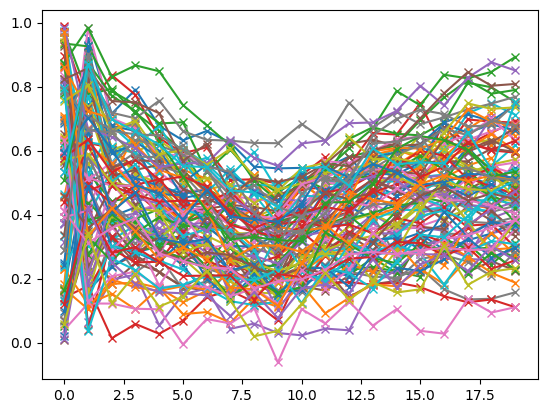

In [ ]:
Xs = range(X_train.shape[1]+1)
for i in range(100):
    l = []
    for j in range(X_train.shape[1]):
        l.append(X_train[i][j][0])
    l.append(y_train[i])
    plt.plot(Xs, l,  '-x')


In [ ]:
def create_lstm_model(units=32, input_shape=(19, 1)):
    """
    Create a simple LSTM model with one LSTM layer followed by a Dense output layer.
    """
    model = Sequential([
        LSTM(units,  activation='sigmoid', 
             recurrent_activation='sigmoid', name='lstm_layer'),
        Dense(1, name='output_layer')
    ])
    
    # Build the model
    model.build(input_shape=(None,) + input_shape)
    
    model.compile(optimizer='adam', loss='mse')
    return model

In [ ]:

# Create and compile the model
lstm_model = create_lstm_model(20)

# Print model summary
print("LSTM Model architecture summary:")
lstm_model.summary()

LSTM Model architecture summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_layer (LSTM)               │ (None, 20)             │         1,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,781 (6.96 KB)

 Trainable params: 1,781 (6.96 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = lstm_model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_data=(X_test, y_test),
                    verbose=1)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0893 - val_loss: 0.0423
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0403 - val_loss: 0.0381
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0359 - val_loss: 0.0357
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0341 - val_loss: 0.0339
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0322 - val_loss: 0.0319
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0304 - val_loss: 0.0300
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0285 - val_loss: 0.0280
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0266 - val_loss: 0.0260
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0246 - val_loss: 0.0240
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0226 - val_loss: 0.0219
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0207 - val_loss: 0.0199
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0187 - val_l

In [ ]:
# Visualize training history
def plot_training_history(history):
    """
    Plot the training and validation loss during model training.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss During Training')
    plt.ylabel('Mean Squared Error')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid(True)
    # In a real application, you would save this figure
    print("In a real application, this would display a plot of training/validation loss")

# Making predictions and visualizing results
def visualize_predictions(model, X_test, y_test, num_examples=5):
    """
    Visualize predictions against actual values.
    """
    predictions = model.predict(X_test[:num_examples])
    
    print("\nLSTM Predictions vs Actual Values:")
    for i in range(num_examples):
        print(f"Example {i+1}:")
        print(f"Last 5 values in input sequence: {X_test[i, -5:, 0]}")
        print(f"First 2 values in input sequence: {X_test[i, 0:2, 0]}")
        print(f"Predicted value: {predictions[i][0]:.4f}")
        print(f"Actual value: {y_test[i]:.4f}")
        print(f"Error: {abs(predictions[i][0] - y_test[i]):.4f}")
        print("-" * 50)

In a real application, this would display a plot of training/validation loss


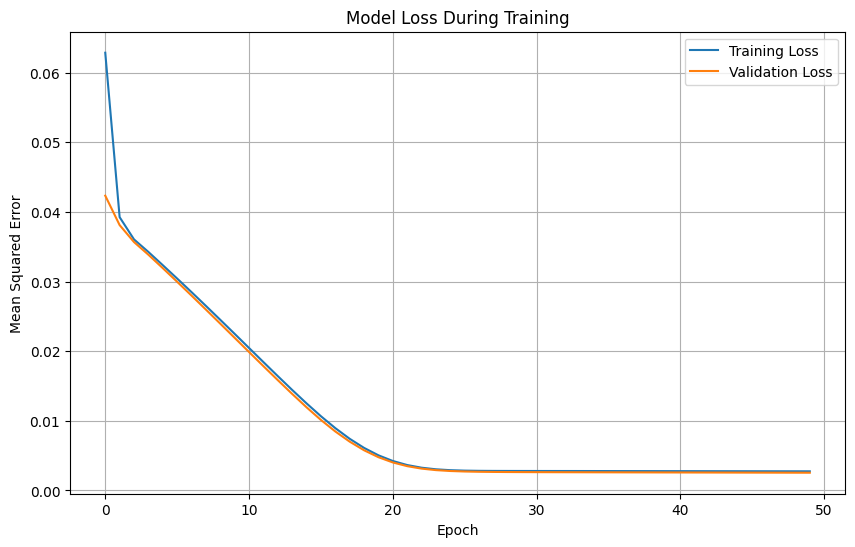

In [ ]:
plot_training_history(history)

In [ ]:
visualize_predictions(lstm_model, X_test, y_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step

LSTM Predictions vs Actual Values:
Example 1:
Last 5 values in input sequence: [0.36424918 0.39155509 0.40307753 0.37345673 0.42284096]
First 2 values in input sequence: [0.35564843 0.43400002]
Predicted value: 0.4255
Actual value: 0.3375
Error: 0.0881
--------------------------------------------------
Example 2:
Last 5 values in input sequence: [0.40821474 0.42741601 0.40026945 0.38114808 0.51169165]
First 2 values in input sequence: [0.91740693 0.31647453]
Predicted value: 0.4876
Actual value: 0.5338
Error: 0.0462
--------------------------------------------------
Example 3:
Last 5 values in input sequence: [0.33465527 0.19461792 0.21041411 0.20534301 0.08874073]
First 2 values in input sequence: [0.0631492  0.59334366]
Predicted value: 0.1887
Actual value: 0.0902
Error: 0.0985
--------------------------------------------------
Example 4:
Last 5 values in input sequence: [0.7034505  0.74143006 0.78250156 0.73729911 0.80014994]
First 2 values in 